In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
images = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/COVID/Covid_images_unn.npy')
masks = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/COVID/Covid_masks_unn.npy')

In [3]:
X_test = images[2893:3616]
y_test = masks[2893:3616]

In [4]:
images = images[0:2893]
masks = masks[0:2893]

In [5]:
images.shape

(2893, 512, 512, 1)

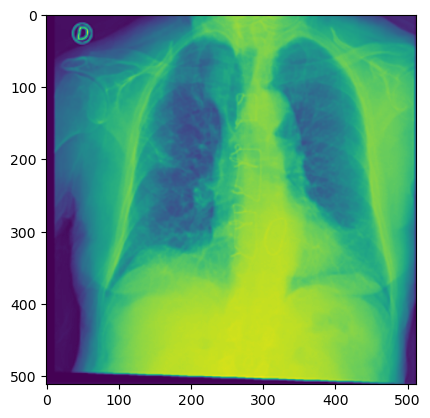

In [6]:
imshow(images[100])

In [7]:
masks.shape

(2893, 512, 512, 1)

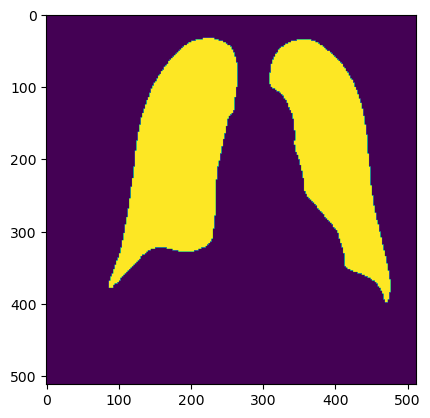

In [8]:
imshow(masks[100])

In [9]:
import sys
sys.path.append('../')
import gp2

In [10]:
from keras import losses

In [11]:
loss_fx = losses.BCE

In [12]:
C = gp2.KUC_UNet2D(loss=loss_fx, model_path='/tmp/tmpofrf4l4wkuc_unet2d/kuc_unet2d_0kuc_unet2d_model')

*** GP2  KUC U-Net2D ***
Working directory: /tmp/tmp1jlov74ukuc_unet2d


In [13]:
from runner import Runner
R = Runner(verbose=True, workingdir=C.workingdir)

*** GP2 ***
Working directory: /tmp/tmp1jlov74ukuc_unet2d
Verbose mode active!


In [14]:
R.classifier = C ### use custom classifier

In [15]:
R.run(images, masks, runs=10, batch_size=16, shuffle=True, results_file='/raid/mpsych/OMAMA/GP2/results/kuc_unet2d_0kuc_unet2d_model_1_10_covid2.pkl')

Shuffling data...
Weights OK!
******
Loop 1
Epoch 1/100
9/9 [==============================] - 17s 711ms/step - loss: 0.3659 - dice_coeff: 0.5468 - val_loss: 0.3395 - val_dice_coeff: 0.5627
Epoch 2/100
9/9 [==============================] - 4s 518ms/step - loss: 0.3413 - dice_coeff: 0.5603 - val_loss: 0.3354 - val_dice_coeff: 0.5605
Epoch 3/100
9/9 [==============================] - 5s 529ms/step - loss: 0.3370 - dice_coeff: 0.5708 - val_loss: 0.3335 - val_dice_coeff: 0.5675
Epoch 4/100
9/9 [==============================] - 4s 516ms/step - loss: 0.3332 - dice_coeff: 0.5732 - val_loss: 0.3300 - val_dice_coeff: 0.5621
Epoch 5/100
9/9 [==============================] - 4s 518ms/step - loss: 0.3339 - dice_coeff: 0.5762 - val_loss: 0.3289 - val_dice_coeff: 0.5703
Epoch 6/100
9/9 [==============================] - 4s 512ms/step - loss: 0.3358 - dice_coeff: 0.5791 - val_loss: 0.3248 - val_dice_coeff: 0.5756
Model saved to: /tmp/tmp1jlov74ukuc_unet2d/kuc_unet2d_0kuc_unet2d_model
History saved

27/27 [==============================] - 9s 335ms/step - loss: 0.0384 - dice_coeff: 0.9550 - val_loss: 0.0510 - val_dice_coeff: 0.9496
Epoch 8/100
27/27 [==============================] - 9s 342ms/step - loss: 0.0334 - dice_coeff: 0.9605 - val_loss: 0.0501 - val_dice_coeff: 0.9525
Epoch 9/100
27/27 [==============================] - 9s 338ms/step - loss: 0.0311 - dice_coeff: 0.9622 - val_loss: 0.0472 - val_dice_coeff: 0.9574
Epoch 10/100
27/27 [==============================] - 9s 338ms/step - loss: 0.0286 - dice_coeff: 0.9658 - val_loss: 0.0477 - val_dice_coeff: 0.9599
Epoch 11/100
27/27 [==============================] - 9s 336ms/step - loss: 0.0272 - dice_coeff: 0.9672 - val_loss: 0.0474 - val_dice_coeff: 0.9593
Epoch 12/100
27/27 [==============================] - 9s 338ms/step - loss: 0.0283 - dice_coeff: 0.9660 - val_loss: 0.0501 - val_dice_coeff: 0.9555
Epoch 13/100
27/27 [==============================] - 9s 336ms/step - loss: 0.0278 - dice_coeff: 0.9668 - val_loss: 0.0489 - va

In [16]:
R.classifier_scores

[[0.3343290388584137, 0.5746739506721497],
 [0.3471575975418091, 0.5963417291641235],
 [0.34068119525909424, 0.6232643127441406],
 [0.17971238493919373, 0.8044533133506775],
 [0.10406381636857986, 0.9004036784172058],
 [0.053075581789016724, 0.9533619284629822],
 [0.05307595804333687, 0.9509820342063904],
 [0.04973871260881424, 0.9558510184288025],
 [0.046579428017139435, 0.965947151184082],
 [0.05452512949705124, 0.9670941233634949]]

In [17]:
R.discriminator_scores

[[13.07432746887207, 0.49132949113845825],
 [10.827762603759766, 0.5375722646713257],
 [10.92229175567627, 0.5491329431533813],
 [12.106769561767578, 0.4971098303794861],
 [12.103365898132324, 0.5028901696205139],
 [11.943830490112305, 0.52601158618927],
 [11.895153999328613, 0.49132949113845825],
 [11.233572959899902, 0.5433526039123535],
 [13.495538711547852, 0.47398844361305237],
 [11.089920997619629, 0.5491329431533813]]

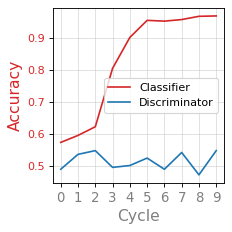

In [18]:
R.plot()

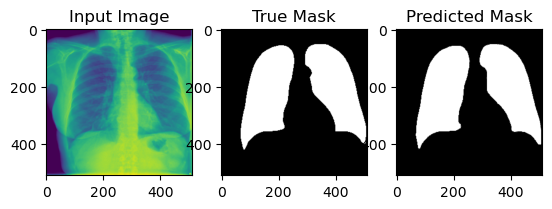

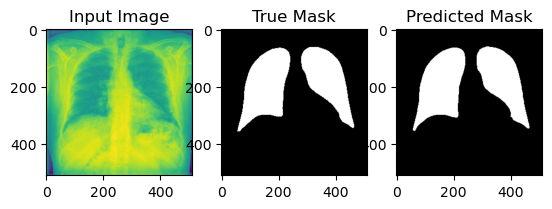

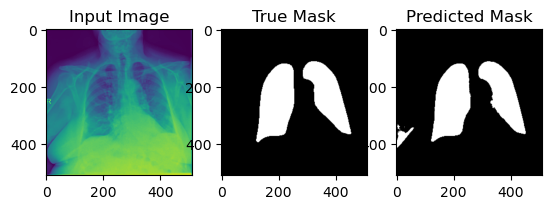

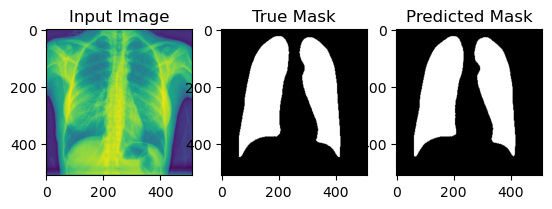

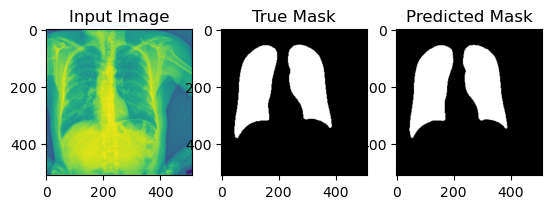

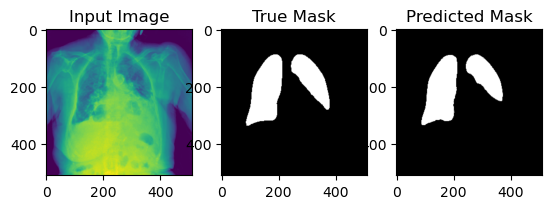

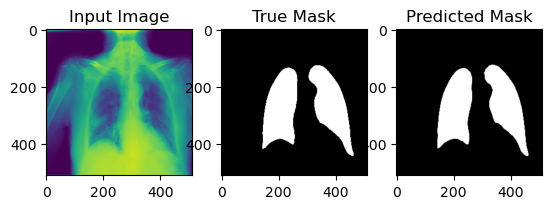

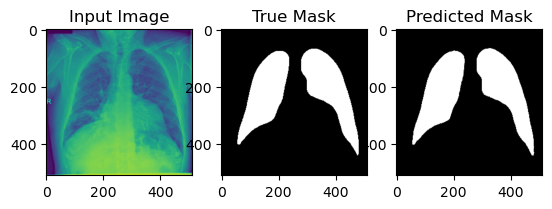

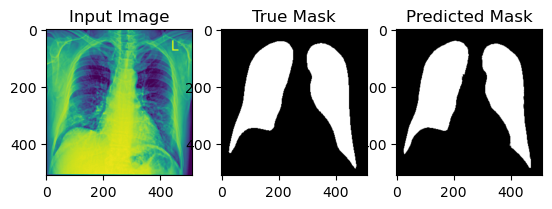

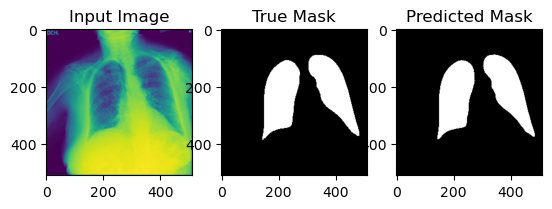

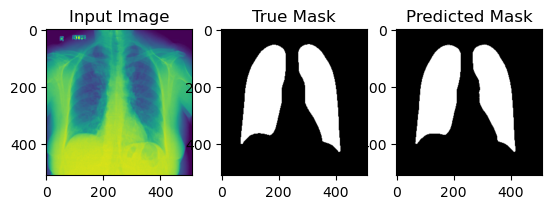

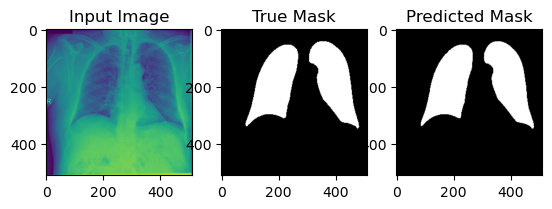

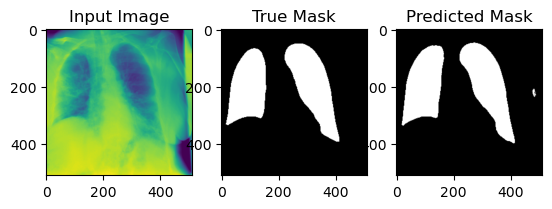

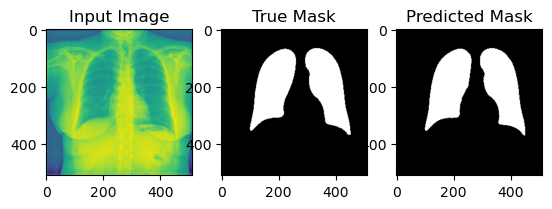

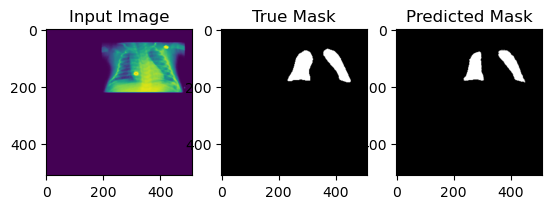

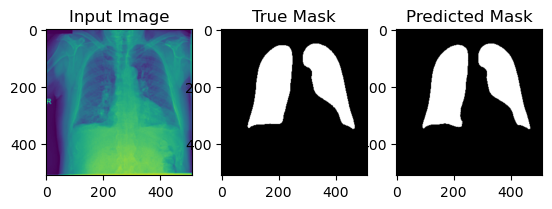

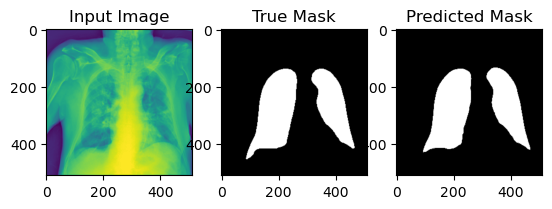

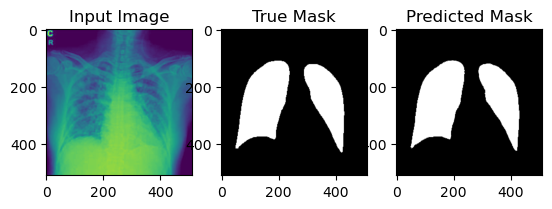

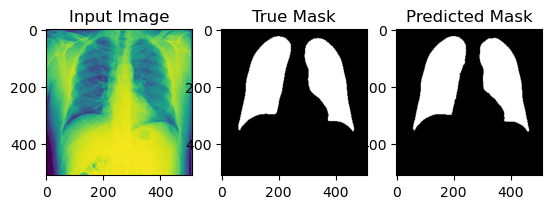

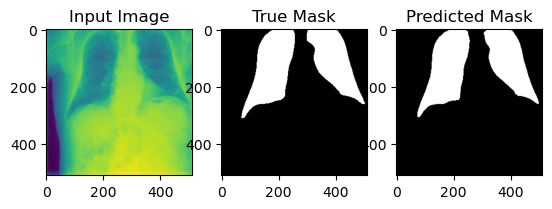

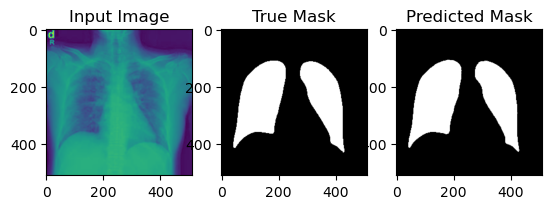

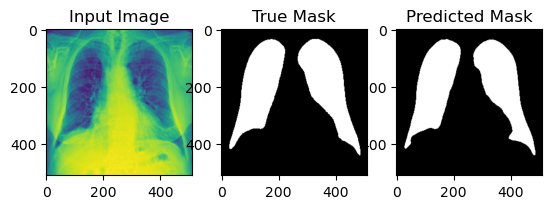

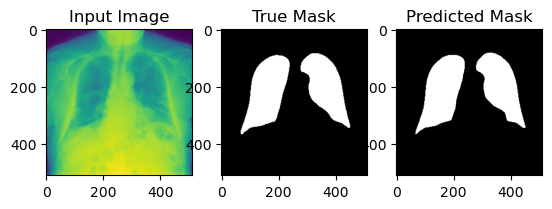

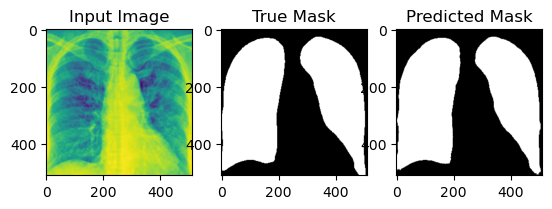

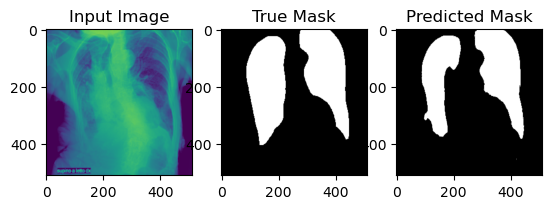

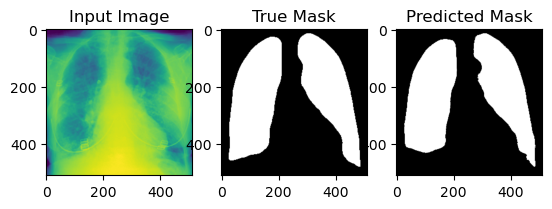

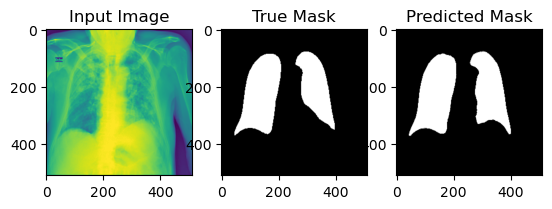

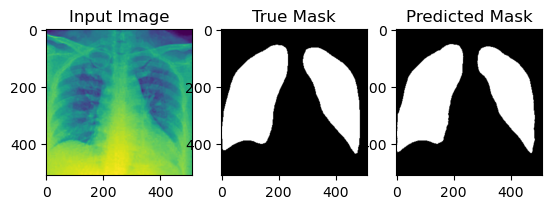

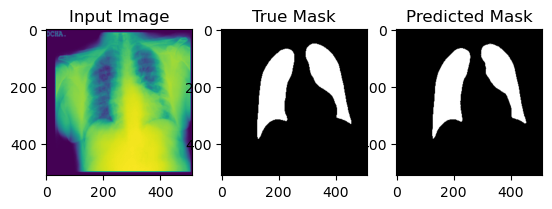

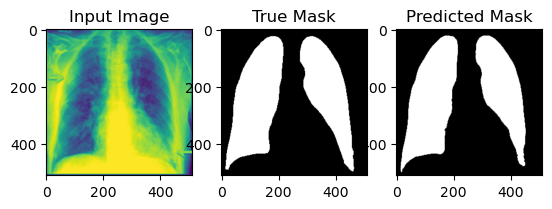

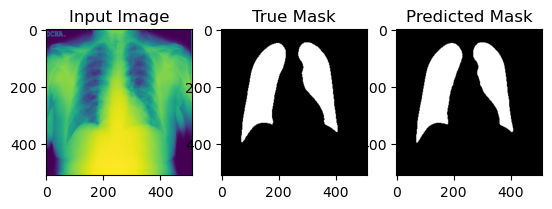

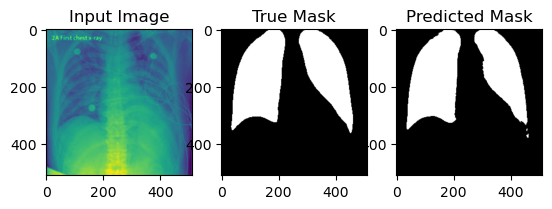

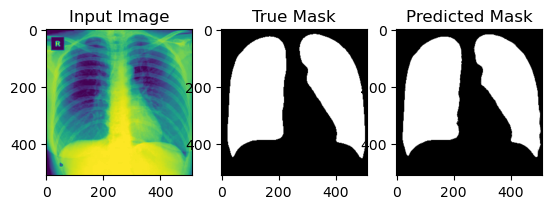

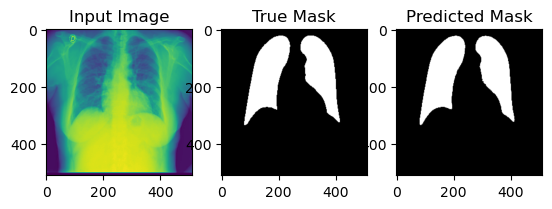

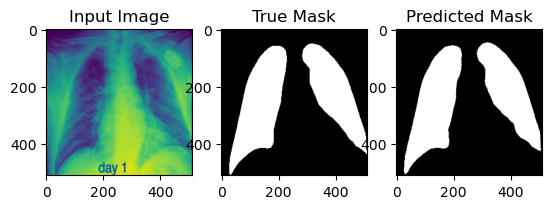

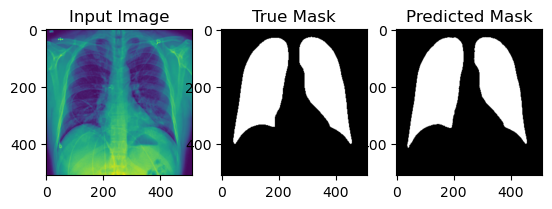

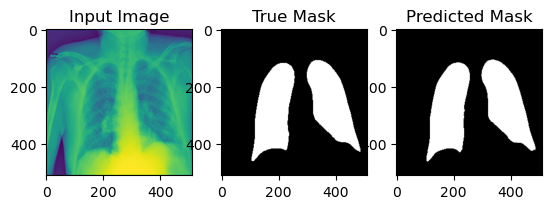

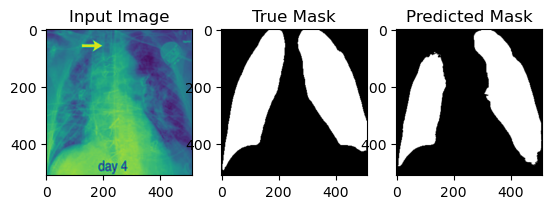

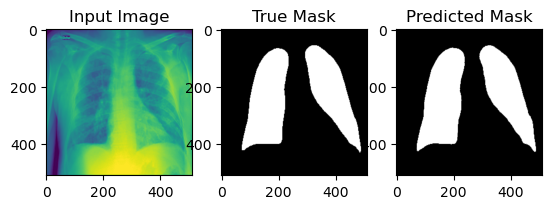

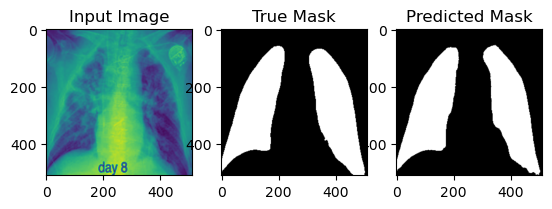

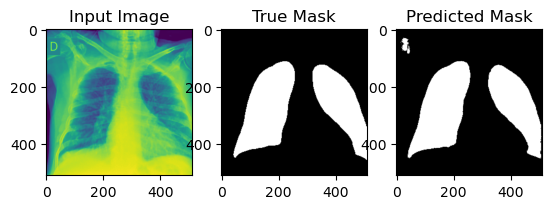

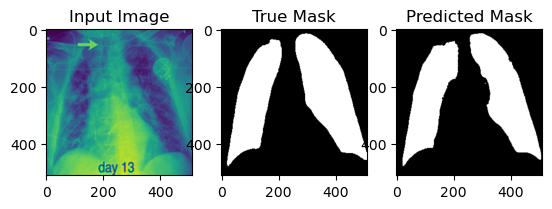

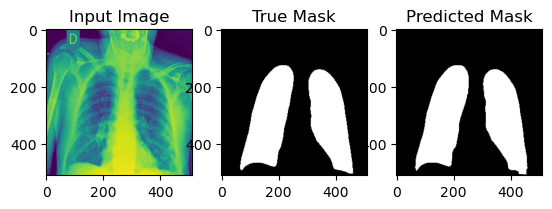

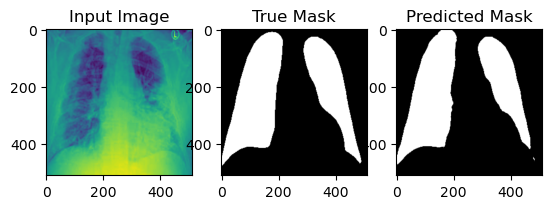

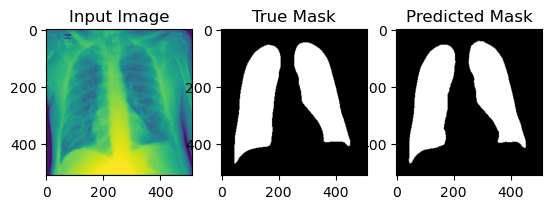

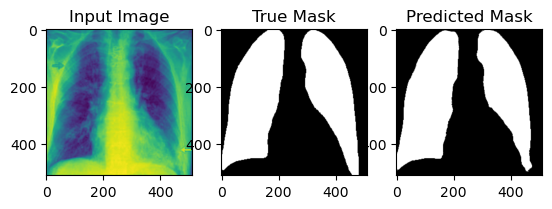

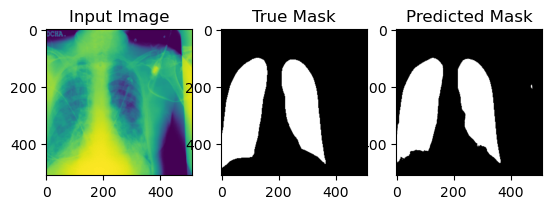

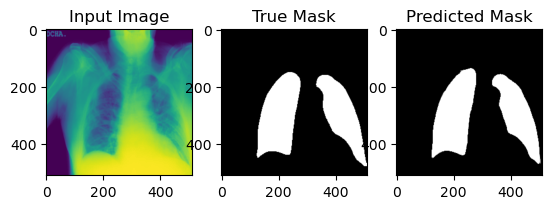

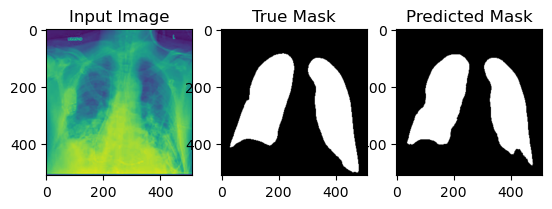

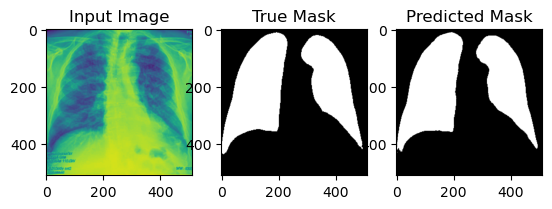

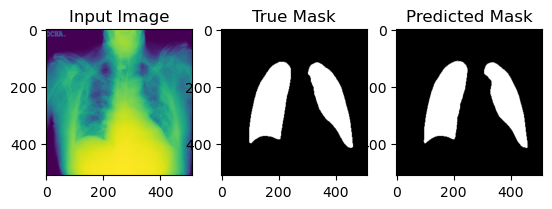

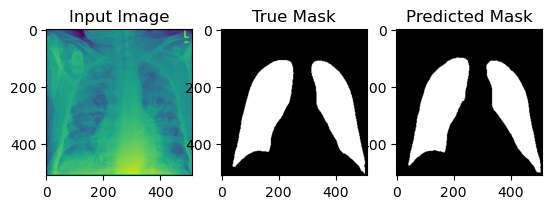

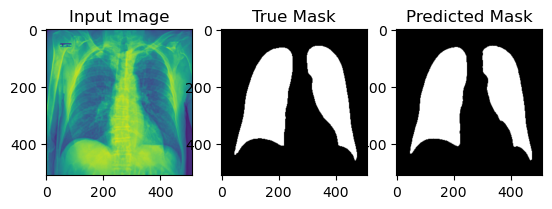

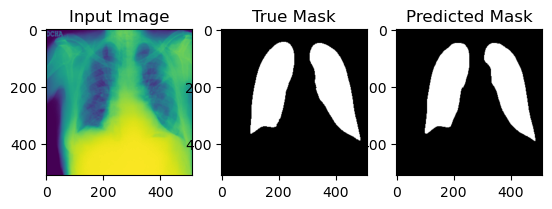

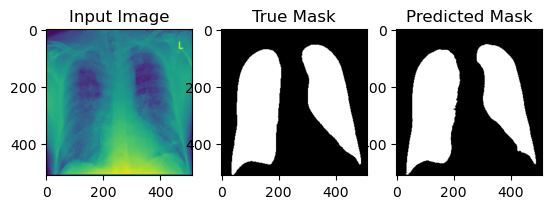

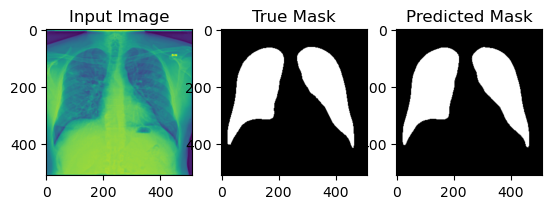

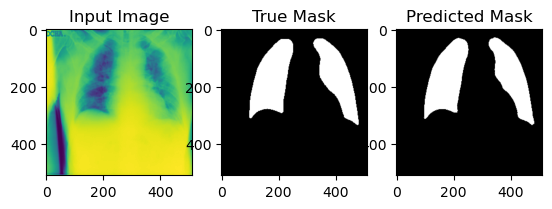

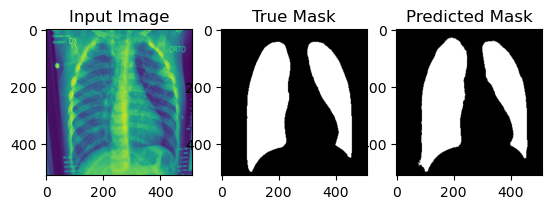

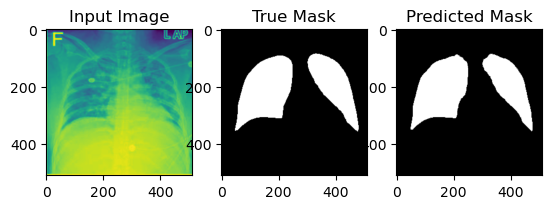

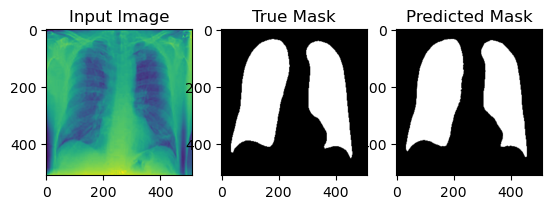

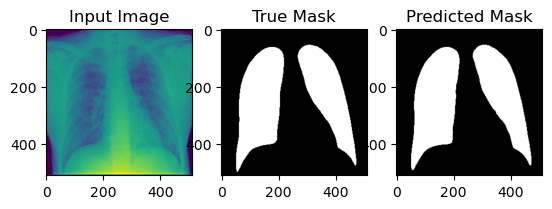

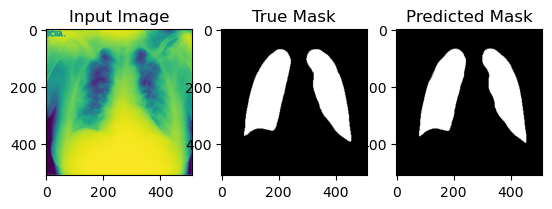

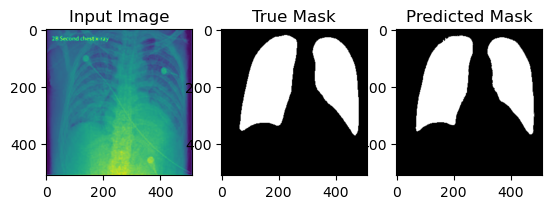

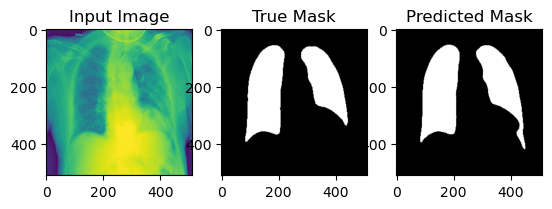

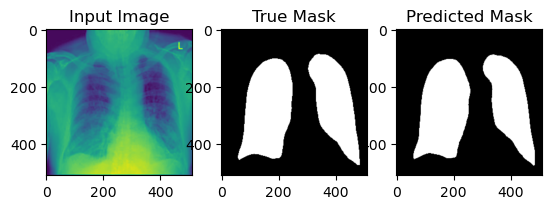

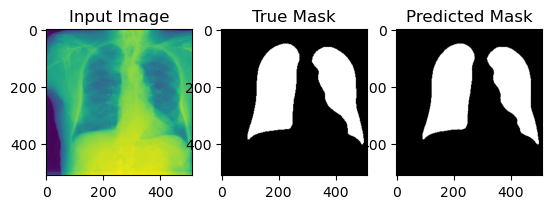

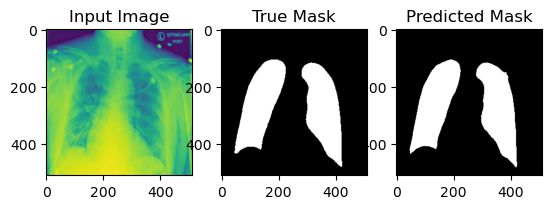

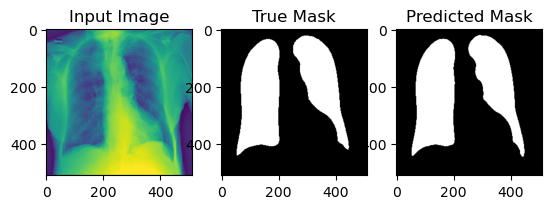

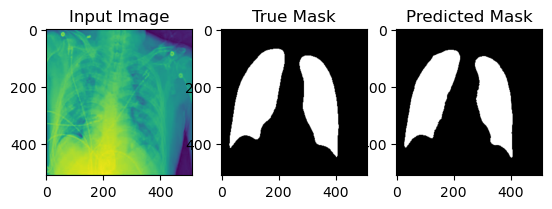

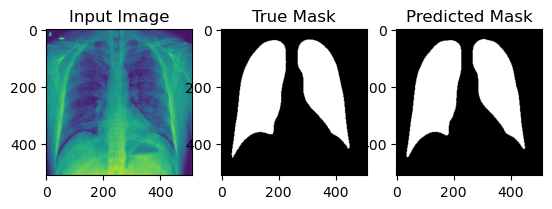

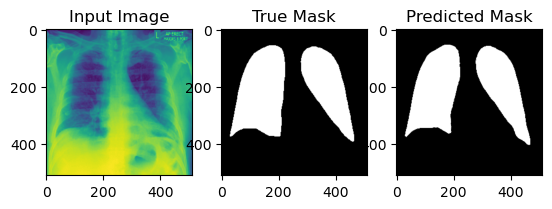

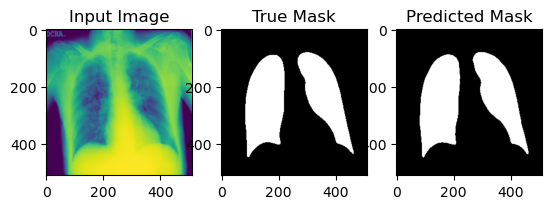

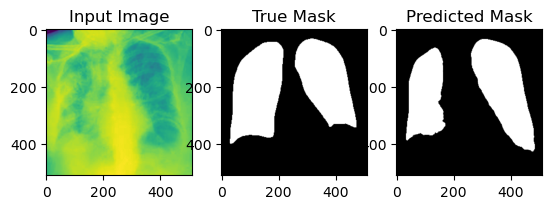

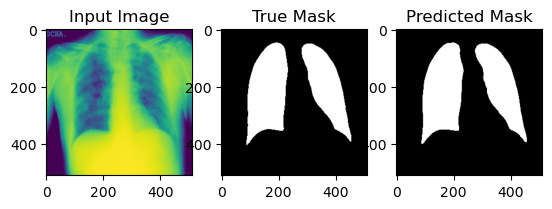

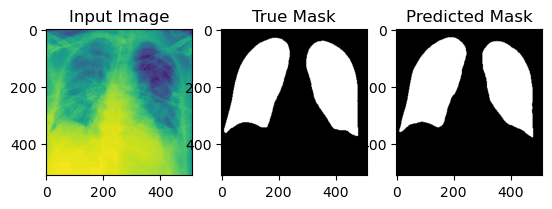

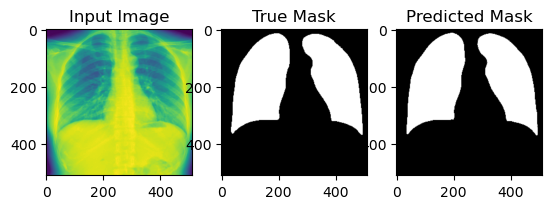

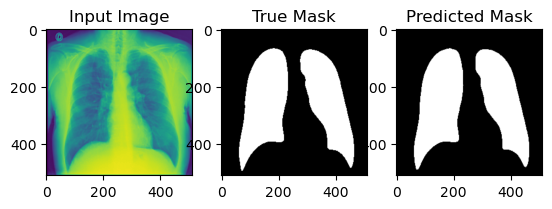

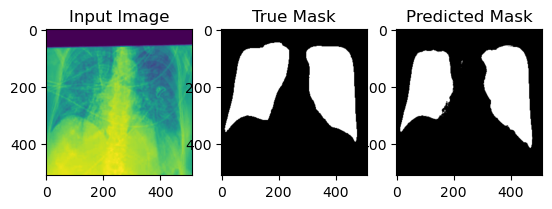

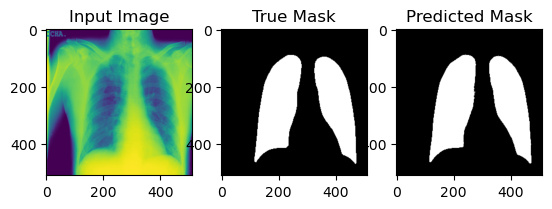

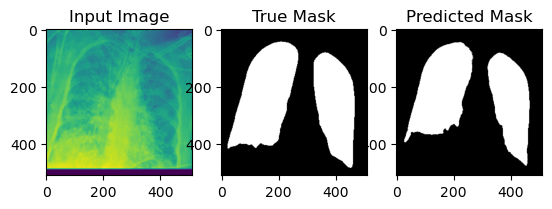

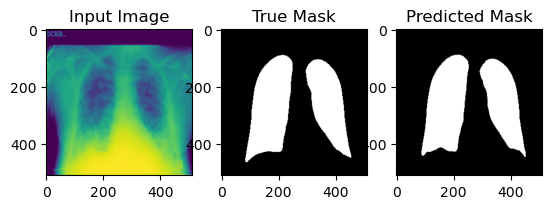

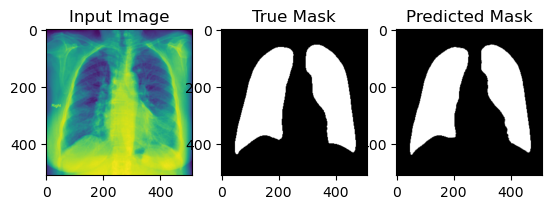

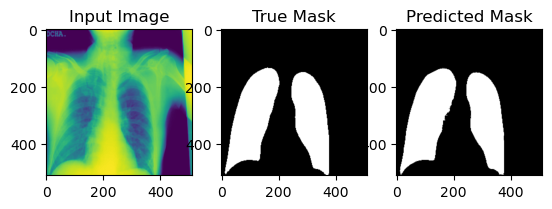

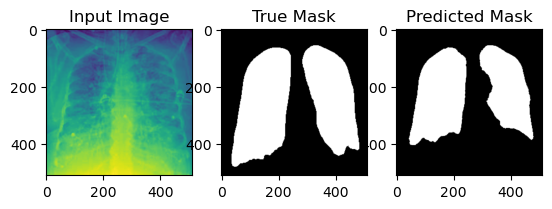

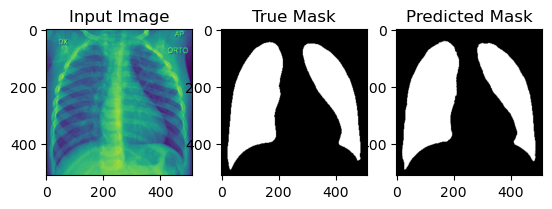

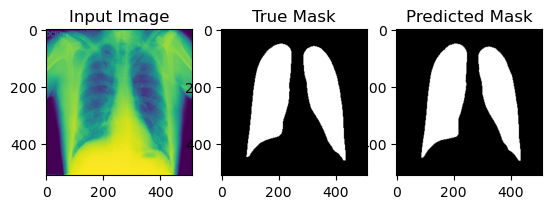

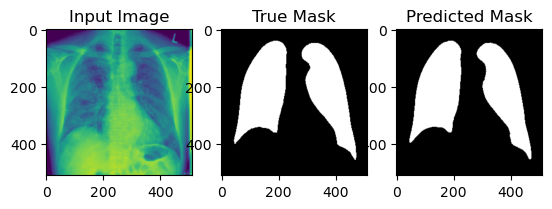

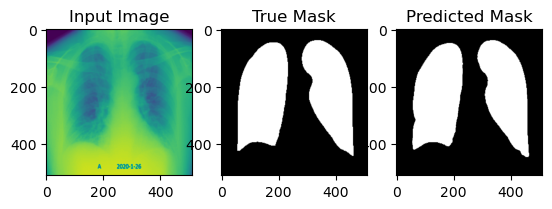

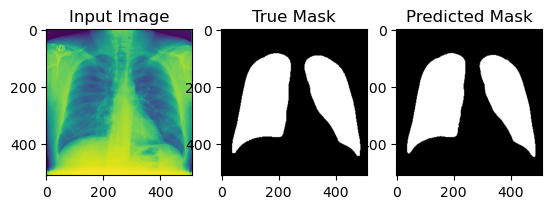

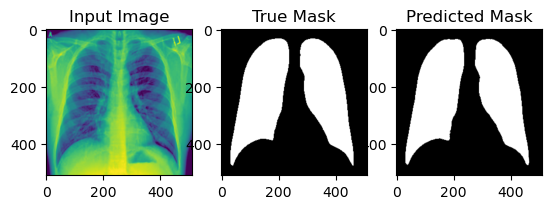

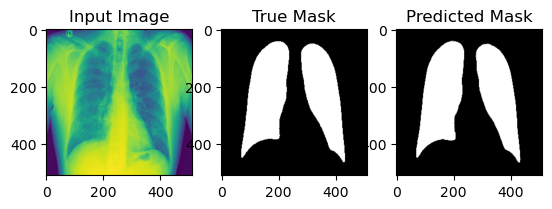

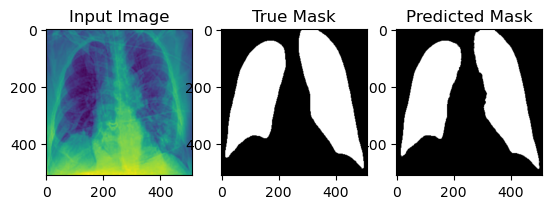

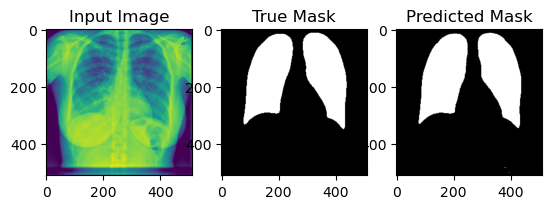

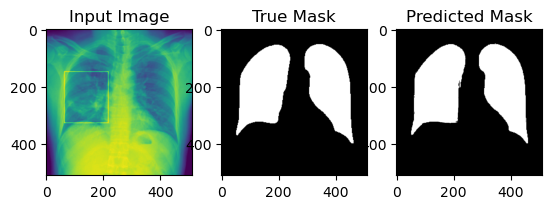

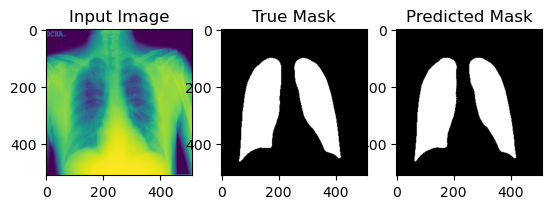

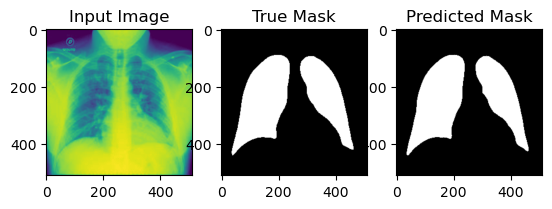

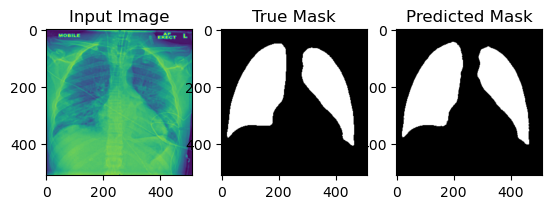

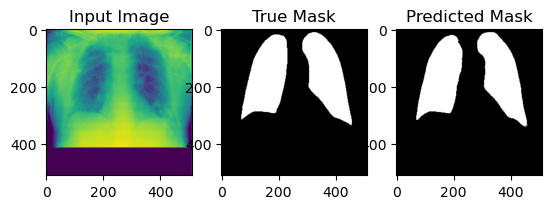

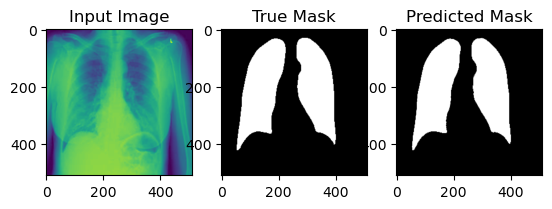

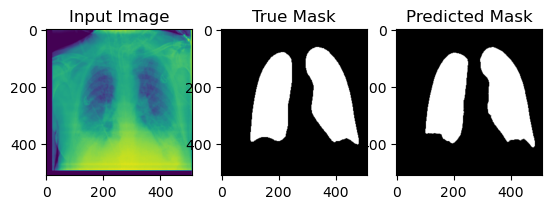

In [19]:
gp2.Util.visualize_predictions(C, X_test, y_test, num_samples=100)

In [20]:
y_pred = R.classifier.predict(X_test, y_test)

In [21]:
y_pred

(array([[[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         ...,
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]]],
 
 
        [[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
      

In [22]:
BareBone = gp2.KUC_UNet2D(loss=loss_fx, model_path='/tmp/tmpofrf4l4wkuc_unet2d/kuc_unet2d_0kuc_unet2d_model')

*** GP2  KUC U-Net2D ***
Working directory: /tmp/tmp1jlov74ukuc_unet2d


In [23]:
barebone_pred = BareBone.predict(X_test, y_test)

In [24]:
barebone_pred

(array([[[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         ...,
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]]],
 
 
        [[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
      

In [25]:
BareBone.model.metrics_names

['loss', 'dice_coeff']